<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/UAS_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
cdc_national_health_and_nutrition_examination_survey_path = kagglehub.dataset_download('cdc/national-health-and-nutrition-examination-survey')

print('Data source import complete.')


100%|██████████| 6.87M/6.87M [00:00<00:00, 85.7MB/s]

Extracting files...


Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [4]:
demographic_data = pd.read_csv("demographic.csv", encoding="latin1")
diet_data = pd.read_csv("diet.csv", encoding="latin1")
examination_data = pd.read_csv("examination.csv", encoding="latin1")
labs_data = pd.read_csv("labs.csv", encoding="latin1")
medications_data = pd.read_csv("medications.csv", encoding="latin1")
questionnaire_data = pd.read_csv("questionnaire.csv", encoding="latin1")

# pd.read_csv('demographic.csv')        # Demografi
# pd.read_csv('diet.csv')               # Nutrisi
# pd.read_csv('examination.csv')        # Berat, tinggi, BMI
# pd.read_csv('questionnaire.csv')
# pd.read_csv('labs.csv')
# pd.read_csv('medications.csv')


In [5]:
demographic_data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [6]:
diet_data.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [7]:
examination_data.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [8]:
labs_data.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [9]:
medications_data.head()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [10]:
questionnaire_data.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [11]:
merged_data = demographic_data.copy()
merged_data = merged_data.merge(examination_data, on='SEQN', how='left')
merged_data = merged_data.merge(labs_data, on='SEQN', how='left')
merged_data = merged_data.merge(medications_data, on='SEQN', how='left')
merged_data = merged_data.merge(questionnaire_data, on='SEQN', how='left')
merged_data = merged_data.merge(diet_data, on='SEQN', how='left')

In [12]:
selected_features = ['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1',
                     'DR1TSUGR', 'DR1TCARB',
                     'BMXBMI', 'BMXWAIST',
                     'LBDSGLSI', 'LBXGH', 'LBXIN',
                     'RXDUSE', 'RXDDRUG', 'RXDCOUNT',
                     'DIQ010']

new_data = merged_data[selected_features].copy()

In [13]:
new_data.isnull().sum()

,0
SEQN,0
RIDAGEYR,0
RIAGENDR,0
RIDRETH1,0
DR1TSUGR,2975
DR1TCARB,2975
BMXBMI,1672
BMXWAIST,2746
LBDSGLSI,4677
LBXGH,4442


In [14]:
new_data = new_data.drop(columns=['LBXIN'])

In [15]:
new_data['RXDDRUG'] = new_data['RXDDRUG'].fillna('Unknown')

In [16]:
for column in ['RXDCOUNT','LBDSGLSI', 'LBXGH', 'DR1TSUGR', 'DR1TCARB', 'BMXWAIST', 'BMXBMI']:
    new_data[column] = new_data[column].fillna(new_data[column].median())

In [17]:
new_data = new_data.dropna(subset=['DIQ010'])

In [18]:
new_data = new_data[new_data['DIQ010'].isin([1.0, 2.0])]

In [19]:
new_data['DIQ010'] = new_data['DIQ010'].map({1.0: 1, 2.0: 0})

In [20]:
def create_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'NormalWeight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obesity_Class_I'
    elif 35 <= bmi < 40:
        return 'Obesity_Class_II'
    else:
        return 'Obesity_Class_III'

new_data['BMICategory'] = new_data['BMXBMI'].apply(create_bmi_category)

In [21]:
def create_age_group(age):
    if age <= 17:
        return 'Child_Adolescent'
    elif 18 <= age <= 34:
        return 'YoungAdult'
    elif 35 <= age <= 49:
        return 'MiddleAged_1'
    elif 50 <= age <= 64:
        return 'MiddleAged_2'
    elif 65 <= age <= 79:
        return 'SeniorAdult'
    else: # age >= 80
        return 'Elderly'

new_data['AgeGroup'] = new_data['RIDAGEYR'].apply(create_age_group)


In [22]:
new_data['Glucose_Prediabetic_Risk'] = ((new_data['LBDSGLSI'] >= 100) & (new_data['LBDSGLSI'] < 126)).astype(int)
new_data['Glucose_Diabetic_Level'] = (new_data['LBDSGLSI'] >= 126).astype(int)

new_data['HbA1c_Prediabetic_Risk'] = ((new_data['LBXGH'] >= 5.7) & (new_data['LBXGH'] < 6.5)).astype(int)
new_data['HbA1c_Diabetic_Level'] = (new_data['LBXGH'] >= 6.5).astype(int)

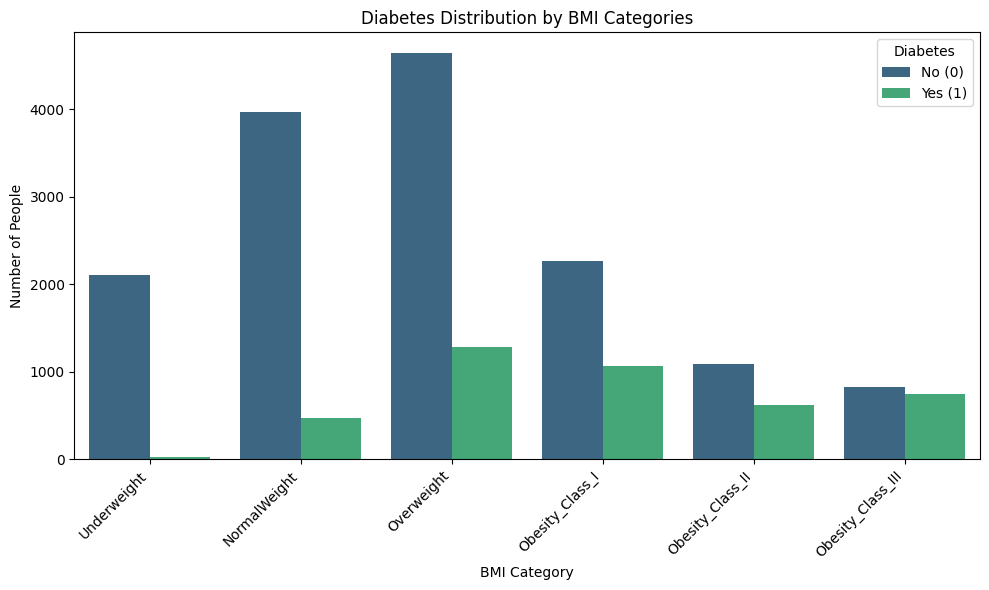

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x='BMICategory', hue='DIQ010', palette='viridis',
              order=['Underweight', 'NormalWeight', 'Overweight', 'Obesity_Class_I', 'Obesity_Class_II', 'Obesity_Class_III'])
plt.title('Diabetes Distribution by BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diabetes', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

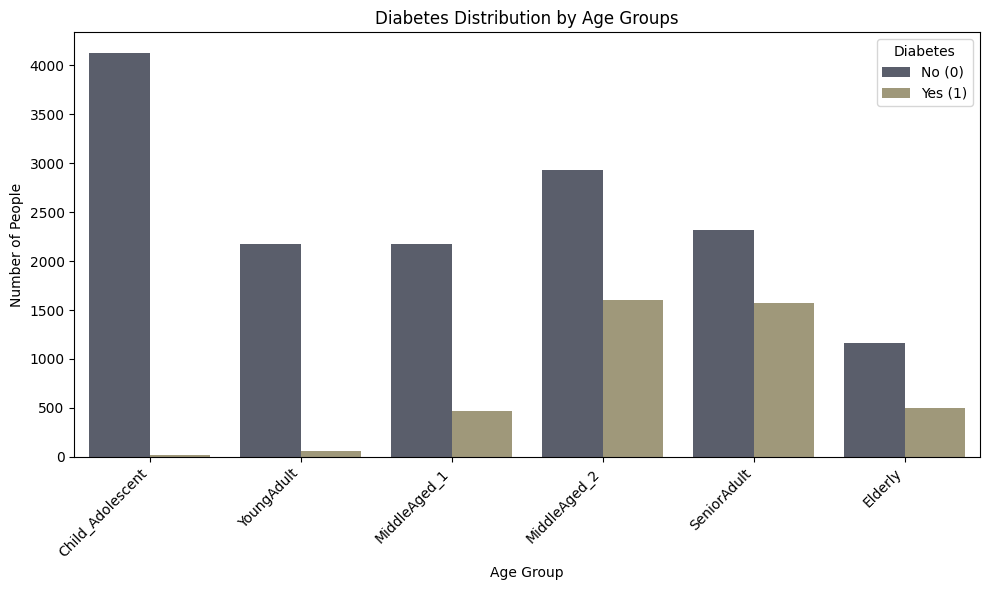

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x='AgeGroup', hue='DIQ010', palette='cividis',
              order=['Child_Adolescent', 'YoungAdult', 'MiddleAged_1', 'MiddleAged_2', 'SeniorAdult', 'Elderly'])
plt.title('Diabetes Distribution by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diabetes', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

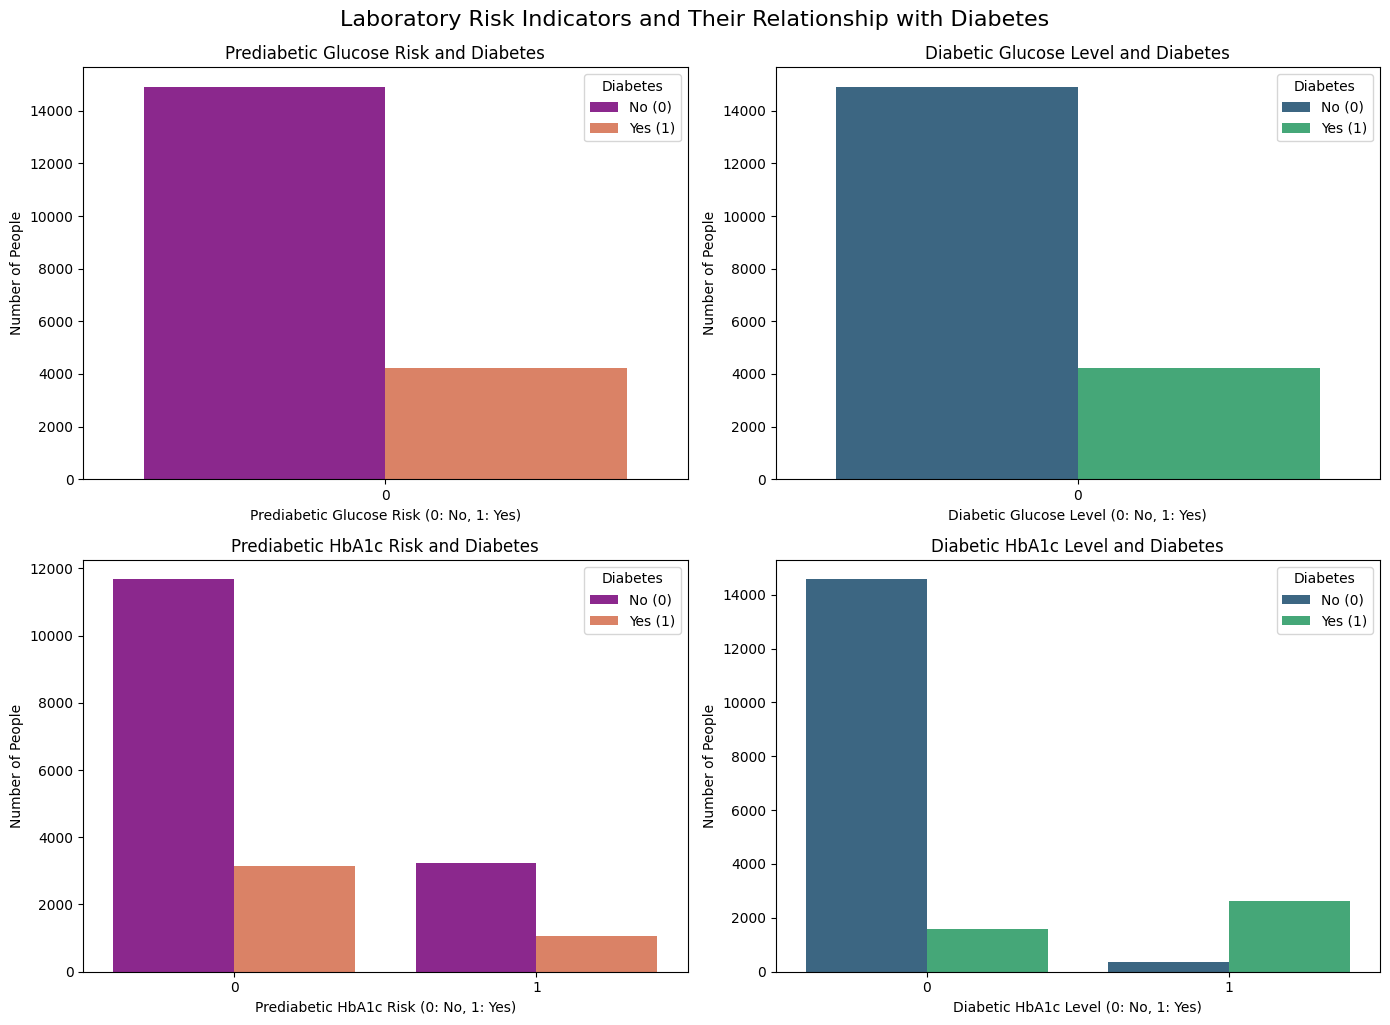

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(data=new_data, x='Glucose_Prediabetic_Risk', hue='DIQ010', palette='plasma', ax=axes[0, 0])
axes[0, 0].set_title('Prediabetic Glucose Risk and Diabetes')
axes[0, 0].set_xlabel('Prediabetic Glucose Risk (0: No, 1: Yes)')
axes[0, 0].set_ylabel('Number of People')
axes[0, 0].legend(title='Diabetes', labels=['No (0)', 'Yes (1)'])
sns.countplot(data=new_data, x='Glucose_Diabetic_Level', hue='DIQ010', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Diabetic Glucose Level and Diabetes')
axes[0, 1].set_xlabel('Diabetic Glucose Level (0: No, 1: Yes)')
axes[0, 1].set_ylabel('Number of People')
axes[0, 1].legend(title='Diabetes', labels=['No (0)', 'Yes (1)'])
sns.countplot(data=new_data, x='HbA1c_Prediabetic_Risk', hue='DIQ010', palette='plasma', ax=axes[1, 0])
axes[1, 0].set_title('Prediabetic HbA1c Risk and Diabetes')
axes[1, 0].set_xlabel('Prediabetic HbA1c Risk (0: No, 1: Yes)')
axes[1, 0].set_ylabel('Number of People')
axes[1, 0].legend(title='Diabetes', labels=['No (0)', 'Yes (1)'])
sns.countplot(data=new_data, x='HbA1c_Diabetic_Level', hue='DIQ010', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Diabetic HbA1c Level and Diabetes')
axes[1, 1].set_xlabel('Diabetic HbA1c Level (0: No, 1: Yes)')
axes[1, 1].set_ylabel('Number of People')
axes[1, 1].legend(title='Diabetes', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.suptitle('Laboratory Risk Indicators and Their Relationship with Diabetes', y=1.02, fontsize=16)
plt.show()

/tmp/ipython-input-26-2216721780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Glucose_Prediabetic_Risk', data=new_data, palette='pastel')


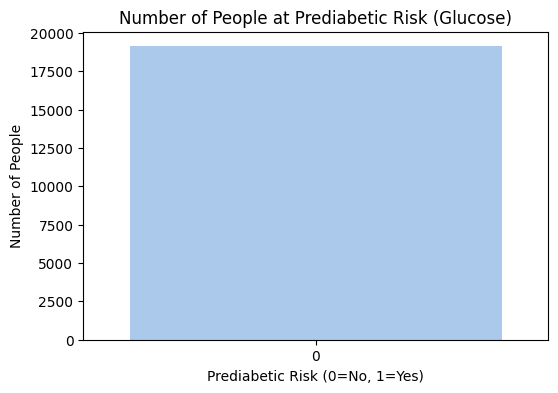

/tmp/ipython-input-26-2216721780.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Glucose_Diabetic_Level', data=new_data, palette='muted')


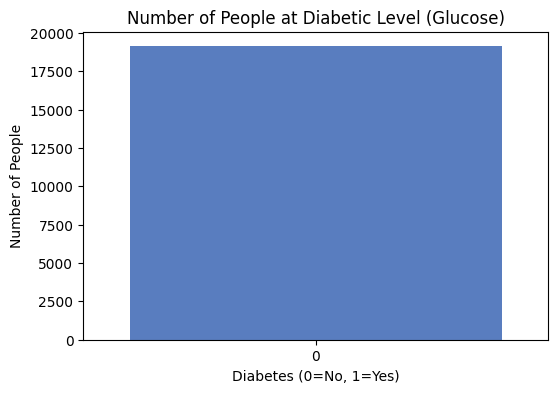

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='Glucose_Prediabetic_Risk', data=new_data, palette='pastel')
plt.title("Number of People at Prediabetic Risk (Glucose)")
plt.xlabel("Prediabetic Risk (0=No, 1=Yes)")
plt.ylabel("Number of People")
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(x='Glucose_Diabetic_Level', data=new_data, palette='muted')
plt.title("Number of People at Diabetic Level (Glucose)")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Number of People")
plt.show()

In [27]:
new_data = pd.get_dummies(new_data, columns=['RIAGENDR', 'RIDRETH1', 'RXDDRUG', 'BMICategory', 'AgeGroup'], drop_first=True)

print("\nFirst 5 Rows of the DataFrame After One-Hot Encoding")
print(new_data.head())
print("\nDataFrame Info After One-Hot Encoding:")
new_data.info()



First 5 Rows of the DataFrame After One-Hot Encoding
    SEQN  RIDAGEYR  DR1TSUGR  DR1TCARB  BMXBMI  BMXWAIST  LBDSGLSI  LBXGH  \
0  73557        69    176.47    239.59    26.7     100.0     30.75   13.9   
1  73557        69    176.47    239.59    26.7     100.0     30.75   13.9   
2  73558        54     44.99    423.78    28.6     107.6     12.16    9.1   
3  73558        54     44.99    423.78    28.6     107.6     12.16    9.1   
4  73558        54     44.99    423.78    28.6     107.6     12.16    9.1   

   RXDUSE  RXDCOUNT  ...  BMICategory_Obesity_Class_I  \
0       1       2.0  ...                        False   
1       1       2.0  ...                        False   
2       1       4.0  ...                        False   
3       1       4.0  ...                        False   
4       1       4.0  ...                        False   

   BMICategory_Obesity_Class_II  BMICategory_Obesity_Class_III  \
0                         False                          False   
1       

In [28]:
def cap_outliers_iqr(new_data_column):
    Q1 = new_data_column.quantile(0.25)
    Q3 = new_data_column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return new_data_column.clip(lower=lower_bound, upper=upper_bound)

In [29]:
numeric_cols = new_data.select_dtypes(include=np.number).columns.tolist()

In [30]:
numeric_cols_to_exclude_from_capping = ['SEQN', 'DIQ010'] + [col for col in new_data.columns if col.startswith(('RIAGENDR_', 'RIDRETH1_', 'RXDDRUG_'))]
cols_to_cap = [col for col in numeric_cols if col not in numeric_cols_to_exclude_from_capping]

print(f"\nColumns to apply outlier handling: {cols_to_cap}")


Columns to apply outlier handling: ['RIDAGEYR', 'DR1TSUGR', 'DR1TCARB', 'BMXBMI', 'BMXWAIST', 'LBDSGLSI', 'LBXGH', 'RXDUSE', 'RXDCOUNT', 'Glucose_Prediabetic_Risk', 'Glucose_Diabetic_Level', 'HbA1c_Prediabetic_Risk', 'HbA1c_Diabetic_Level']


In [31]:
for col in cols_to_cap:
    new_data[col] = cap_outliers_iqr(new_data[col])

print("\nDescriptive statistics of numerical columns after capping outliers (first 5 rows):\n", new_data[cols_to_cap].describe().head())


Descriptive statistics of numerical columns after capping outliers (first 5 rows):
            RIDAGEYR      DR1TSUGR      DR1TCARB        BMXBMI      BMXWAIST  \
count  19126.000000  19126.000000  19126.000000  19126.000000  19126.000000   
mean      45.876503     98.332521    227.922492     28.023384     95.990181   
std       25.177544     52.882654     92.588867      7.643347     20.961048   
min        1.000000      0.130000      8.670000     12.100000     48.750000   
25%       22.000000     61.122500    166.640000     22.900000     84.300000   

           LBDSGLSI         LBXGH        RXDUSE      RXDCOUNT  \
count  19126.000000  19126.000000  19126.000000  19126.000000   
mean       5.626898      5.728072      1.298207      5.470956   
std        0.934659      0.587249      0.458553      2.733444   
min        3.625000      4.500000      1.000000      1.000000   
25%        5.050000      5.400000      1.000000      4.000000   

       Glucose_Prediabetic_Risk  Glucose_Diabetic

In [32]:
cols_to_scale = [col for col in cols_to_cap if col != 'DIQ010' and col != 'SEQN']
scaler = StandardScaler()
new_data[cols_to_scale] = scaler.fit_transform(new_data[cols_to_scale])

print("\nFirst 5 Rows of the DataFrame After Scaling (Scaled Numerical Columns):")
print(new_data[cols_to_scale].head())
print("\nDescriptive Statistics of Numerical Columns After Scaling:")
print(new_data[cols_to_scale].describe().head())



First 5 Rows of the DataFrame After Scaling (Scaled Numerical Columns):
   RIDAGEYR  DR1TSUGR  DR1TCARB    BMXBMI  BMXWAIST  LBDSGLSI     LBXGH  \
0  0.918442  1.477602  0.126017 -0.173147  0.191304  1.923856  1.995676   
1  0.918442  1.477602  0.126017 -0.173147  0.191304  1.923856  1.995676   
2  0.322657 -1.008722  2.115402  0.075442  0.553890  1.923856  1.995676   
3  0.322657 -1.008722  2.115402  0.075442  0.553890  1.923856  1.995676   
4  0.322657 -1.008722  2.115402  0.075442  0.553890  1.923856  1.995676   

     RXDUSE  RXDCOUNT  Glucose_Prediabetic_Risk  Glucose_Diabetic_Level  \
0 -0.650338 -1.269843                       0.0                     0.0   
1 -0.650338 -1.269843                       0.0                     0.0   
2 -0.650338 -0.538147                       0.0                     0.0   
3 -0.650338 -0.538147                       0.0                     0.0   
4 -0.650338 -0.538147                       0.0                     0.0   

   HbA1c_Prediabetic_Risk

In [33]:
X = new_data.drop(columns=["SEQN", "DIQ010"])
y = new_data["DIQ010"]


nan_in_y_incides = y[y.isna()].index
if len(nan_in_y_incides) > 0:
    print(f"Warning: {len(nan_in_y_indices)} missing (NaN) values found in the target variable 'y'.")
    print("These rows are being removed from X and y...")
    X = X.drop(nan_in_y_incides)
    y = y.drop(nan_in_y_incides)
    print("Missing values have been removed.")
else:
    print("No missing values found in the target variable 'y'.")



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining Set Size (X_train): {X_train.shape}")
print(f"Test Set Size (X_test): {X_test.shape}")
print(f"\nTarget Distribution in Training Set:\n{y_train.value_counts(normalize=True)}")
print(f"\nTarget Distribution in Test Set:\n{y_test.value_counts(normalize=True)}")


No missing values found in the target variable 'y'.

Training Set Size (X_train): (15300, 711)
Test Set Size (X_test): (3826, 711)

Target Distribution in Training Set:
DIQ010
0    0.779542
1    0.220458
Name: proportion, dtype: float64

Target Distribution in Test Set:
DIQ010
0    0.779404
1    0.220596
Name: proportion, dtype: float64


In [34]:
models = {
    "logistic regression" : LogisticRegression(random_state=42, solver="liblinear"),
    "random forest classifier" : RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost" : XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = {}

print("\n Models are being trained and evaluated...\n")

for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_proba)
    cmatrix = confusion_matrix(y_test, y_predict)

    results[name] = {
        "Accuracy" : accuracy,
        "Precision" : precision,
        "Recall" : recall,
        "f1_score" : f1,
        "roc-auc" : roc_auc,
        "confusion matrix" : cmatrix
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Reccal: {recall:.4f}")
    print(f"roc_auc score: {roc_auc:.4f}")
    print(f"classification report: \n {classification_report(y_test, y_predict)}")


print("Model Performans Özetleri")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['f1_score']:.4f}")
    print(f"ROC-AUC: {metrics['roc-auc']:.4f}")


 Models are being trained and evaluated...

logistic regression
Accuracy: 0.9158
Precision: 0.8655
Reccal: 0.7322
roc_auc score: 0.9503
classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2982
           1       0.87      0.73      0.79       844

    accuracy                           0.92      3826
   macro avg       0.90      0.85      0.87      3826
weighted avg       0.91      0.92      0.91      3826

random forest classifier
Accuracy: 0.9856
Precision: 0.9925
Reccal: 0.9419
roc_auc score: 0.9942
classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2982
           1       0.99      0.94      0.97       844

    accuracy                           0.99      3826
   macro avg       0.99      0.97      0.98      3826
weighted avg       0.99      0.99      0.99      3826

XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:07:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9888
Precision: 0.9890
Reccal: 0.9597
roc_auc score: 0.9902
classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2982
           1       0.99      0.96      0.97       844

    accuracy                           0.99      3826
   macro avg       0.99      0.98      0.98      3826
weighted avg       0.99      0.99      0.99      3826

Model Performans Özetleri

logistic regression:
Accuracy: 0.9158
Precision: 0.8655
Recall: 0.7322
F1-Score: 0.7933
ROC-AUC: 0.9503

random forest classifier:
Accuracy: 0.9856
Precision: 0.9925
Recall: 0.9419
F1-Score: 0.9666
ROC-AUC: 0.9942

XGBoost:
Accuracy: 0.9888
Precision: 0.9890
Recall: 0.9597
F1-Score: 0.9741
ROC-AUC: 0.9902


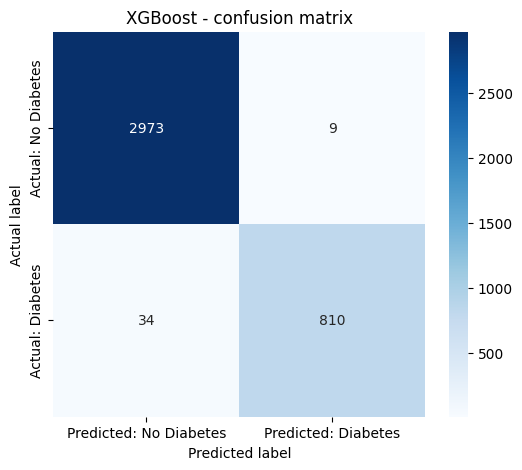

In [35]:
plt.figure(figsize=(6, 5))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap="Blues",
           xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
           yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
plt.title(f"{name} - confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()